# Importing all necessary Libraries 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Collection

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Root2Ai/root2ai - Data.csv')
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


# Data Cleaning

In [36]:
data["Target"].unique()

'Blockchain'

In [3]:
data.isnull().sum()

Text      3
Target    0
dtype: int64

In [4]:
data=data.fillna(" ")

In [5]:
data.isnull().sum()

Text      0
Target    0
dtype: int64

# Data Visualization

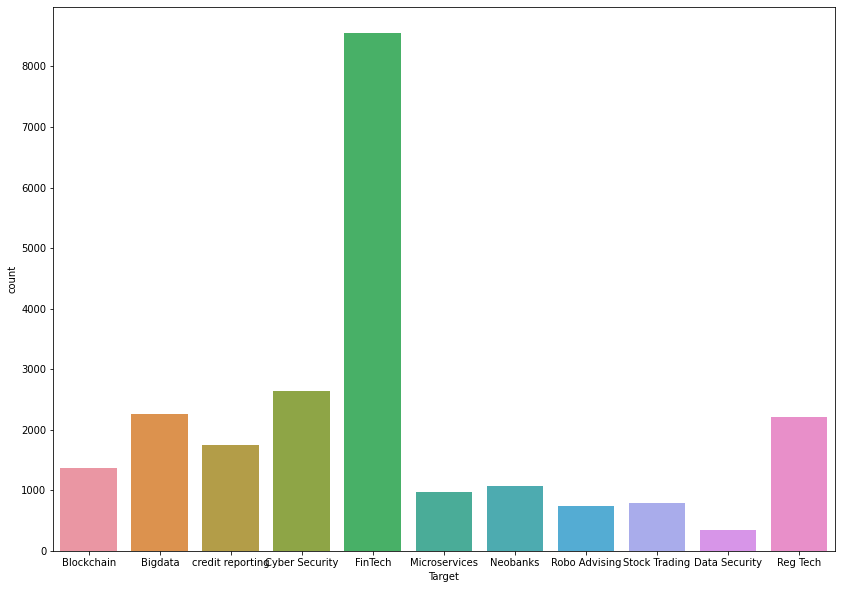

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
ax = sns.countplot(x=data['Target'])

From the above plot we can say that only 'FinTech' category has 8000 rows.So, Its Imbalanced dataset.We need to Balance it with Sampling techniques.

# Converting Text to Numbers

Convert the Target column into numbers with help of LabelEncoder.

In [7]:
df=data.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Target']= label_encoder.fit_transform(df['Target'])

Now Convert the Text column into numbers with help of CountVectorizer 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

Now Lets apply OverSampling with help SMOTETomek this below cell will take more than 5 min


In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X_train_counts,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Convert to Vectors

Lets apply TfIdf and convert to vectors

In [10]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_res)

# Applying Multinomial Classifier

Fit the vectors into Naive Bayes Multinomial Classifier

In [14]:
clf = MultinomialNB().fit(X_train_tfidf, y_res)
my_pred=clf.predict(X_res)

# Metrices

**Testing please change the test list and give your own text and check**

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
test=["khan deputy governor said recent presentation technology significant role play financial system"]

a=str(test[0])

print(df[df['Text'] == a],"\n\n")

s=clf.predict(count_vect.transform(test))

print("\nTHE FINAL CLASSIFICATION RESULT IS:",data["Target"][s])

                                                 Text  Target
15  khan deputy governor said recent presentation ...       1 



THE FINAL CLASSIFICATION RESULT IS: 1    Blockchain
Name: Target, dtype: object


**Accuracy**

In [16]:
acc=accuracy_score(my_pred,y_res)
print(acc)

0.5369853305931542


**Confusion Matrix**

In [47]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


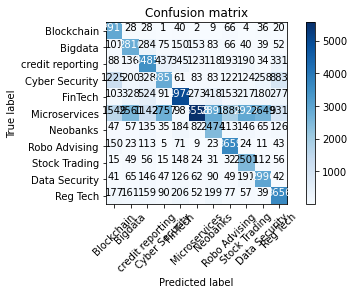

In [48]:
cm = confusion_matrix(my_pred,y_res)
plot_confusion_matrix(cm, classes=['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security','FinTech', 'Microservices', 'Neobanks', 'Robo Advising','Stock Trading', 'Data Security', 'Reg Tech'])

#  Applying Multinomial Classifier with Hyperparameter

In [35]:
import numpy as np
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_tfidf, y_res)
    y_pred=sub_classifier.predict(X_res)
    score = accuracy_score(my_pred,y_res)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.5369853305931542
Alpha: 0.1, Score : 0.5369853305931542
Alpha: 0.2, Score : 0.5369853305931542
Alpha: 0.30000000000000004, Score : 0.5369853305931542
Alpha: 0.4, Score : 0.5369853305931542
Alpha: 0.5, Score : 0.5369853305931542
Alpha: 0.6000000000000001, Score : 0.5369853305931542
Alpha: 0.7000000000000001, Score : 0.5369853305931542
Alpha: 0.8, Score : 0.5369853305931542
Alpha: 0.9, Score : 0.5369853305931542
